<a href="https://colab.research.google.com/github/Shivani-saran/Social-Analytics-Web-Development_Lab/blob/main/Experiment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) calculate word count of a given word. 2) Show top 10 frequent words with their frequency. steps 1) preprocessing 1.1) Case folding 1.2) remove URL's 1.3) Remove stopwords 1.4) tokenization 1.5) lemmatization

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
consumer_key="1J42kbl6Knwpva7wsLv1pBK1X"
consumer_secret="lSCoQfcwMJfe3ipVICwsrDLhALkuwyuAko5KFz1BscmvpMbKVK"
access_token="1498914827460247555-p8e9GbdYNgwNHh1ohsl31RMOFEJXOr"
access_token_secret="oclid72frFFgBOuKZ1wamd0jbRsliSNnFWTGK3Mn33vdW"

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['Opinions surrounding #climate change are the biggest "dealbreaker" out of several topics when it comes to finding a… https://t.co/msKAmlQv6F',
 'In an already unequal world – the triple planetary crisis – of #climate;  #biodiversity loss; #pollution – is  maki… https://t.co/QlO5QHGgyT',
 'New: More than 80 House Democrats sent a letter to Biden today urging him to restart negotiations over the reconcil… https://t.co/BRJoCaKAYL',
 'Climate Change is a true health equity issue that we must address as a medical community head on.\n\nThank you… https://t.co/gm3TGOSohR',
 'Another reason to ban Deep Sea mining that will destroy ocean life that is sequestering huge amounts of  carbon\nA s… https://t.co/rLgqxygogV']

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Opinions surrounding climate change are the biggest dealbreaker out of several topics when it comes to finding a',
 'In an already unequal world the triple planetary crisis of climate biodiversity loss pollution is maki',
 'New More than 80 House Democrats sent a letter to Biden today urging him to restart negotiations over the reconcil',
 'Climate Change is a true health equity issue that we must address as a medical community head onThank you',
 'Another reason to ban Deep Sea mining that will destroy ocean life that is sequestering huge amounts of carbonA s']

In [ ]:
# Note how capitalization impacts unique returned values
ex_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Get unique elements in the list
set(ex_list)

{',', 'Dog', 'cat', 'dog'}

In [ ]:
# Note how capitalization impacts unique returned values
words_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case

['dog', 'dog', 'dog', 'cat', 'cat', ',']

In [ ]:
# Now you have only unique words
set(lower_case)

{',', 'cat', 'dog'}

In [ ]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].split()

['Opinions',
 'surrounding',
 'climate',
 'change',
 'are',
 'the',
 'biggest',
 'dealbreaker',
 'out',
 'of',
 'several',
 'topics',
 'when',
 'it',
 'comes',
 'to',
 'finding',
 'a']

In [ ]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()

['opinions',
 'surrounding',
 'climate',
 'change',
 'are',
 'the',
 'biggest',
 'dealbreaker',
 'out',
 'of',
 'several',
 'topics',
 'when',
 'it',
 'comes',
 'to',
 'finding',
 'a']

In [ ]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['opinions',
  'surrounding',
  'climate',
  'change',
  'are',
  'the',
  'biggest',
  'dealbreaker',
  'out',
  'of',
  'several',
  'topics',
  'when',
  'it',
  'comes',
  'to',
  'finding',
  'a'],
 ['in',
  'an',
  'already',
  'unequal',
  'world',
  'the',
  'triple',
  'planetary',
  'crisis',
  'of',
  'climate',
  'biodiversity',
  'loss',
  'pollution',
  'is',
  'maki']]

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('climate', 777),
 ('the', 654),
 ('change', 577),
 ('to', 483),
 ('of', 342),
 ('and', 342),
 ('in', 269),
 ('a', 224),
 ('is', 223),
 ('on', 161),
 ('for', 157),
 ('we', 102),
 ('are', 97),
 ('climatechange', 90),
 ('this', 88)]

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,climate,777
1,the,654
2,change,577
3,to,483
4,of,342


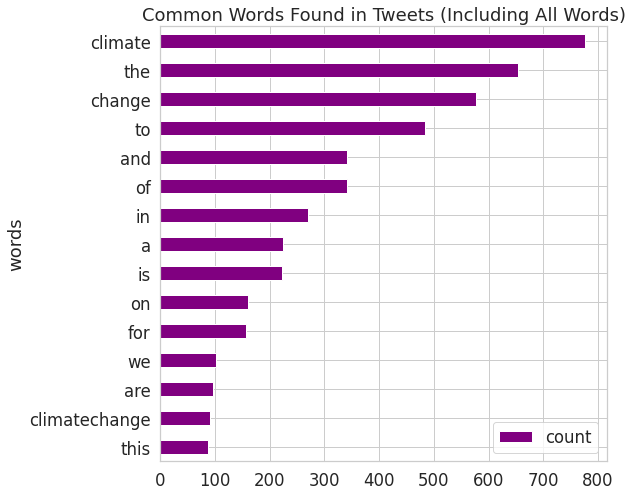

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['she', "she's", 'before', 'to', 'y', 'aren', 'below', 'what', 'down', 'after']

In [ ]:
words_in_tweet[0]

['opinions',
 'surrounding',
 'climate',
 'change',
 'are',
 'the',
 'biggest',
 'dealbreaker',
 'out',
 'of',
 'several',
 'topics',
 'when',
 'it',
 'comes',
 'to',
 'finding',
 'a']

In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['opinions',
 'surrounding',
 'climate',
 'change',
 'biggest',
 'dealbreaker',
 'several',
 'topics',
 'comes',
 'finding']

In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('climate', 777),
 ('change', 577),
 ('climatechange', 90),
 ('amp', 68),
 ('environment', 62),
 ('global', 55),
 ('energy', 45),
 ('new', 44),
 ('links', 44),
 ('report', 42),
 ('green', 37),
 ('security', 37),
 ('us', 37),
 ('people', 35),
 ('nature', 34)]

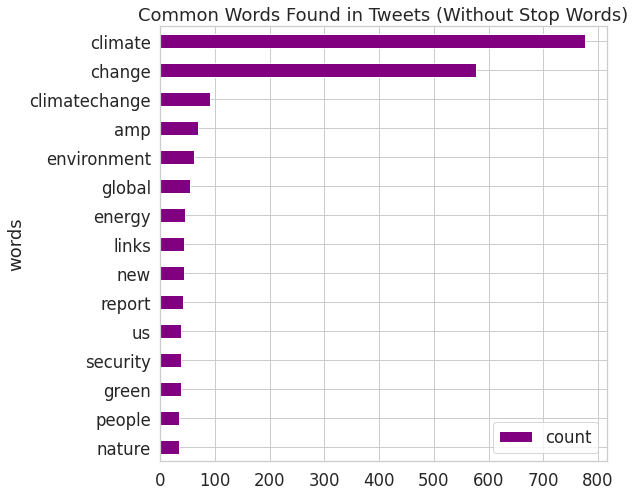

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [ ]:
collection_words = ['climatechange', 'climate', 'change']

In [ ]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [ ]:
tweets_nsw[0]

['opinions',
 'surrounding',
 'climate',
 'change',
 'biggest',
 'dealbreaker',
 'several',
 'topics',
 'comes',
 'finding']

In [ ]:
tweets_nsw_nc[0]

['opinions',
 'surrounding',
 'biggest',
 'dealbreaker',
 'several',
 'topics',
 'comes',
 'finding']

In [ ]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('amp', 68),
 ('environment', 62),
 ('global', 55),
 ('energy', 45),
 ('new', 44),
 ('links', 44),
 ('report', 42),
 ('green', 37),
 ('security', 37),
 ('us', 37),
 ('people', 35),
 ('nature', 34),
 ('impacts', 34),
 ('soil', 32),
 ('need', 31)]

In [ ]:
len(counts_nsw_nc)


4017

In [ ]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,amp,68
1,environment,62
2,global,55
3,energy,45
4,new,44


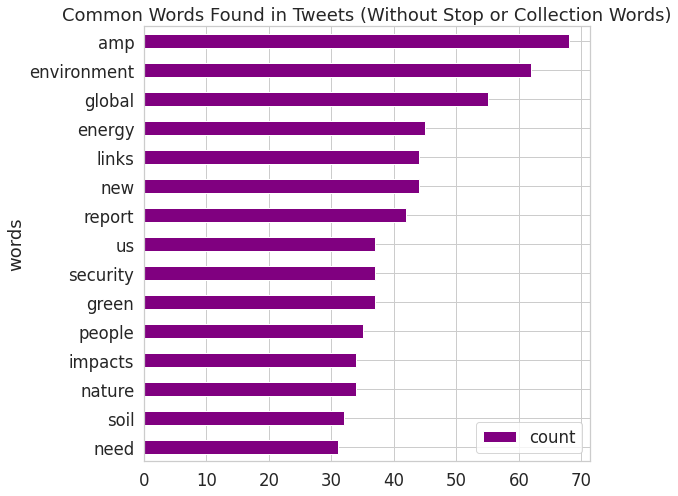

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()